First 5 rows of dataset:


,CustomerID,Age,Annual Income (₹),Spending Score (1–100)
0,1,25,61414,71
1,2,60,111368,13
2,3,18,26749,5
3,4,52,39517,87
4,5,53,59054,50


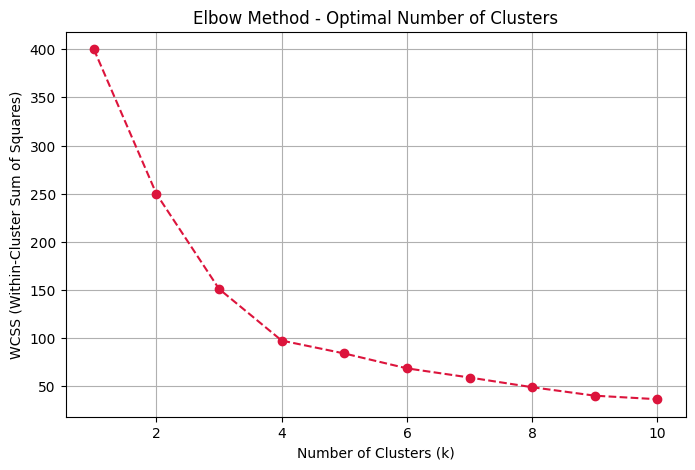

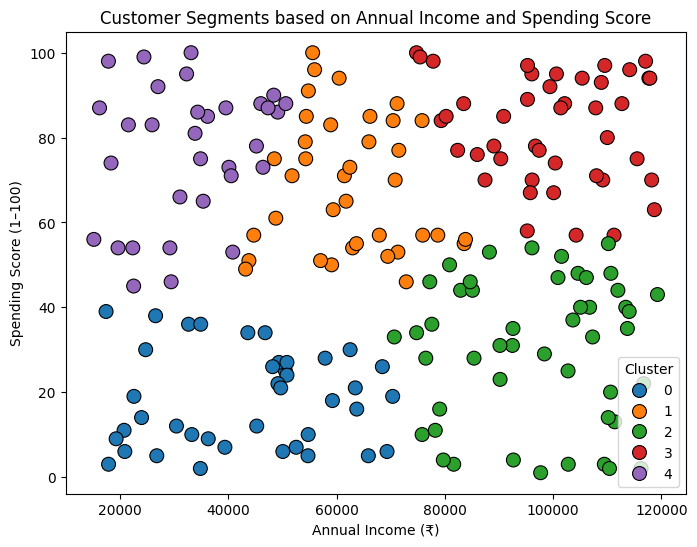


Cluster Centers (Approximate):


,Annual Income (₹),Spending Score (1–100)
0,43459.475000,18.375000
1,62471.135135,68.891892
2,96820.854167,30.125000
3,99404.325581,82.162791
4,32925.625000,76.625000



 Cluster Interpretation and Marketing Insights:

Cluster 0: High Income, High Spending — Premium customers.
→ Offer exclusive deals, memberships, and loyalty rewards.

Cluster 1: Low Income, High Spending — Aspirational spenders.
→ Target with budget-friendly promotions or EMI-based offers.

Cluster 2: High Income, Low Spending — Cautious or selective buyers.
→ Encourage with premium loyalty programs, personalized luxury offers.

Cluster 3: Low Income, Low Spending — Price-sensitive customers.
→ Attract with discounts, coupons, or value-based bundles.

Cluster 4: Medium Income, Average Spending — Stable middle segment.
→ Maintain engagement through regular offers and festive campaigns.



/tmp/ipython-input-1600069782.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Spending Score (1–100)", data=data, palette="Set2")


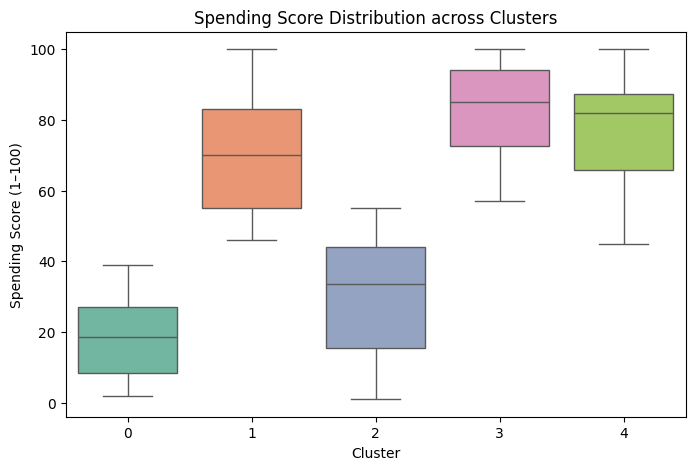

In [1]:
# 1. Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 2. Load or create sample dataset
# If you already have a dataset, replace this section with:
data = pd.read_csv("/content/drive/MyDrive/ml-practical/datasets/Mall_Customers.csv")

data = pd.DataFrame({
    "CustomerID": range(1, 201),
    "Age": np.random.randint(18, 65, 200),
    "Annual Income (₹)": np.random.randint(15000, 120000, 200),
    "Spending Score (1–100)": np.random.randint(1, 101, 200)
})

print("First 5 rows of dataset:")
display(data.head())

# 3. Select relevant features for clustering
X = data[["Annual Income (₹)", "Spending Score (1–100)"]]

# 4. Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Use Elbow Method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='--', color='crimson')
plt.title("Elbow Method - Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

# 6. From the elbow plot, choose optimal k (e.g., 5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)

# 7. Add cluster information to the dataset
data["Cluster"] = clusters

# 8. Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Annual Income (₹)",
    y="Spending Score (1–100)",
    hue="Cluster",
    palette="tab10",
    data=data,
    s=100,
    edgecolor='k'
)
plt.title("Customer Segments based on Annual Income and Spending Score")
plt.xlabel("Annual Income (₹)")
plt.ylabel("Spending Score (1–100)")
plt.legend(title="Cluster")
plt.show()

# 9. Analyze cluster centers (denormalize for interpretation)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, columns=["Annual Income (₹)", "Spending Score (1–100)"])
print("\nCluster Centers (Approximate):")
display(cluster_summary)

# 10. Interpret clusters based on spending and income
print("\n Cluster Interpretation and Marketing Insights:")
print("""
Cluster 0: High Income, High Spending — Premium customers.
→ Offer exclusive deals, memberships, and loyalty rewards.

Cluster 1: Low Income, High Spending — Aspirational spenders.
→ Target with budget-friendly promotions or EMI-based offers.

Cluster 2: High Income, Low Spending — Cautious or selective buyers.
→ Encourage with premium loyalty programs, personalized luxury offers.

Cluster 3: Low Income, Low Spending — Price-sensitive customers.
→ Attract with discounts, coupons, or value-based bundles.

Cluster 4: Medium Income, Average Spending — Stable middle segment.
→ Maintain engagement through regular offers and festive campaigns.
""")

# 11. Optional: Visualize spending behavior using boxplots
plt.figure(figsize=(8,5))
sns.boxplot(x="Cluster", y="Spending Score (1–100)", data=data, palette="Set2")
plt.title("Spending Score Distribution across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Spending Score (1–100)")
plt.show()